[Tutorial source](https://towardsdatascience.com/data-cleaning-and-feature-engineering-in-python-b4d448366022)

### Load data from GitHub repo

In [21]:
import pandas as pd
url = 'https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv'
housing = pd.read_csv(url,index_col=0)

In [22]:
housing.head()

,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [23]:
housing.reset_index(drop=True,inplace=True)

In [24]:
housing.head()

,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [25]:
housing.shape

(11330, 18)

### Look at scatterplots and remove outliers

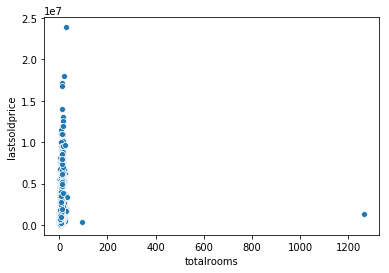

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.scatterplot(housing['totalrooms'],housing['lastsoldprice']);

Single point in lower right is an outlier. 

In [27]:
housing['totalrooms'].sort_values(ascending=False).head()

8967     1264.0
8300       94.0
11175      33.0
10727      28.0
2750       28.0
Name: totalrooms, dtype: float64

House 8967 has 1264 rooms. That's pretty suspicious.

In [30]:
housing.iloc[[8967]]

,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
8967,Address: 2829 California Street #3C,San FranciscoSales price: 1375000Sales date: ...,2829 California St APT 3C,2.0,2.0,1264.0,03/14/2013,1375000.0,37.787654,-122.440902,Lower Pacific Heights,1264.0,Condominium,2012.0,1591608.0,"1,146,900",94115.0,119684820.0


There's actually only 2 bathrooms and 2 bedrooms, meaning there's issues with this observation. We should remove it.

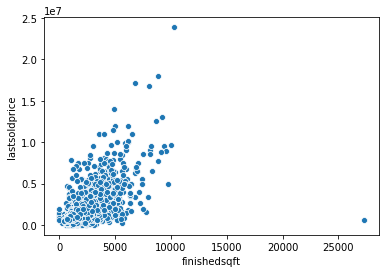

In [33]:
sns.scatterplot(housing['finishedsqft'],housing['lastsoldprice']);

Outlier at the lower right.

In [36]:
housing['finishedsqft'].sort_values()

1618         1.0
3405         1.0
10652        1.0
954          1.0
11136        1.0
5103         1.0
916          1.0
10967        1.0
7383         1.0
1465         1.0
8134       243.0
7300       244.0
6485       250.0
7621       252.0
3199       264.0
10988      265.0
2499       291.0
9156       292.0
10553      292.0
1734       307.0
6588       329.0
4214       360.0
7455       362.0
6936       365.0
92         376.0
4451       383.0
3035       383.0
4437       383.0
1886       385.0
9628       390.0
          ...   
523       6800.0
2765      6807.0
10159     6835.0
2673      6850.0
9547      6968.0
1195      7000.0
6676      7147.0
6762      7260.0
4807      7360.0
625       7375.0
8353      7500.0
10727     7500.0
1920      7750.0
11175     7957.0
1885      8000.0
5408      8120.0
2294      8125.0
7137      8180.0
3225      8335.0
1611      8675.0
8231      8820.0
6766      8822.0
7818      9125.0
427       9190.0
4575      9378.0
5704      9540.0
9650      9699.0
8087     10000

There are ten houses listed at 1 sq ft, which is a mistake. We can turn this into NAs and then impute, or just ignore these observations altogether. The largest hosue is 27,275 sq ft, but it actually only has 2 bedrooms and 2 bathrooms.

In [38]:
housing.iloc[[4997]]

,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
4997,Address: 1645 Pacific Avenue,San FranciscoSales price: 730000Sales date: 0...,1645 Pacific Ave,2.0,2.0,27275.0,03/31/2015,600000.0,37.794658,-122.422325,Nob Hill,6.0,Condominium,1906.0,6754185.0,"1,440,700",94109.0,119685483.0


Now, we can drop all of these outliers. 

In [42]:
outliers = [8967,1618,3405,10652,954,1136,5103,916,10967,7383,1465,4997]
housing = housing.drop(outliers,axis=0)

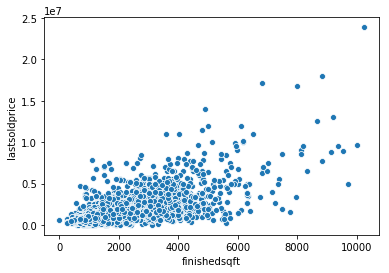

In [44]:
sns.scatterplot(housing['finishedsqft'],housing['lastsoldprice']);

Now that the data's cleaner, we move on to feature engineering.

### Feature engineering

In [46]:
housing['lastsolddate'].head()

0    02/17/2016
1    02/17/2016
2    02/17/2016
3    02/17/2016
4    02/17/2016
Name: lastsolddate, dtype: object

Change the last sold date into a numeric value.

In [47]:
housing['lastsolddateint'] = pd.to_datetime(housing['lastsolddate'],
                                            format='%m/%d/%Y').astype('int')

housing['lastsolddateint'] = housing['lastsolddateint']/1000000000
housing = housing[housing['lastsolddate'].notnull()]

Create a data checkpoint.

In [49]:
clean_data = housing.copy()

The author decides to get rid of some fields, and suggests creating functions to do so.

Some columsn are text values that aren't useful, some are too complicated, and some were produced through other data science techniques. 

In [53]:
def drop_geog(data, keep = []):
    remove_list = ['info','address','z_address','longitude','latitude',
                   'neighborhood','lastsolddate','zipcode','zpid','usecode',
                   'zestimate','zindexvalue'
                  ]
    
    for k in keep:
        remove_list.remove(k)
        
    data = data.drop(remove_list, axis=1)
    return data

In [55]:
housing = drop_geog(housing)

Now that the data's cleaned, we'll work through it with some algorithms. First, we split the data into test and train sets.

In [57]:
from sklearn.model_selection import train_test_split

def split_data(data):
    X = data.drop('lastsoldprice',axis=1)
    y = data['lastsoldprice']
    
    return train_test_split(X, y, test_size=0.2, random_state=30)

In [59]:
housing_split = split_data(housing)

### Linear regression

In [63]:
import sys
import numpy as np

from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

def train_eval(algorithm, grid_params, X_train, X_test, y_train, y_test):
    regression_model = GridSearchCV(algorithm, grid_params, cv=5, n_jobs=1, verbose=1)
    regression_model.fit(X_train,y_train)
    y_pred = regression_model.predict(X_test)
    print("R2: \t", r2_score(y_test, y_pred))
    print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE: \t", mean_absolute_error(y_test, y_pred))
    return regression_model

train_eval(LinearRegression(), {}, *housing_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2: 	 0.4677300066237753
RMSE: 	 707873.6490652725
MAE: 	 419789.4286150072


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

The above is an example of a function that you can recycle for a lot of other things. You just plug in a different regressor.

Notice that the asterisk unpacks the results of housing_split, so that each list element in housing_split becomes an individual element.

### KNN

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn_params = {'n_neighbors': [1,5,10,20,30,50,75,100,200,500]}
model = train_eval(KNeighborsRegressor(), knn_params, *housing_split);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R2: 	 0.1367512669981994
RMSE: 	 901483.389256293
MAE: 	 491385.1671378092


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.5s finished


### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
tree_params = {}
train_eval(DecisionTreeRegressor(), tree_params, *housing_split);

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R2: 	 0.0800317277939061
RMSE: 	 930628.1366209311
MAE: 	 464980.21245583036


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


### Random Forest

In [71]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

forest_params = {'n_estimators':[1000],
                 'max_depth':[None],
                 'min_samples_split':[2]
                }

forest = train_eval(RandomForestRegressor(), forest_params, *housing_split);

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished


R2: 	 0.5291092869108655
RMSE: 	 665809.2381035548
MAE: 	 354215.1470716599


We can try more algorithms, but we can also improve results with feature engineering/data processing.

## Data processing

One-hot encoding.

In [80]:
## keep neighborhood
housing_cleaned = drop_geog(clean_data.copy(), ['neighborhood'])

In [81]:
one_hot = pd.get_dummies(housing_cleaned['neighborhood'])
housing_cleaned = housing_cleaned.drop('neighborhood',axis=1)

We need to split the data.

In [82]:
(X_train, X_test, y_train, y_test) = split_data(housing_cleaned)

Scale and center the data.

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train[X_train.columns] = scaler.transform(X_train[X_train.columns])
X_train = X_train.join(one_hot)

X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test = X_test.join(one_hot)

housing_split_cleaned = (X_train, X_test, y_train, y_test)

First we apply StandardScaler() which scales and centers data. We fit the scaler on training features, X_train.

In [84]:
model = train_eval(LinearRegression(), {}, *housing_split_cleaned)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2: 	 0.5825201304829932
RMSE: 	 626913.3577774942
MAE: 	 365105.0909893993


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [ ]:
model = train_eval(KNeighborsRegressor(), knn_params, *housing_split_cleaned)

In [86]:
model = train_eval(DecisionTreeRegressor(), tree_params, *housing_split_cleaned)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R2: 	 0.32299945814889697
RMSE: 	 798333.3317245023
MAE: 	 355109.3891342756


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [87]:
model = train_eval(RandomForestRegressor(), forest_params, *housing_split_cleaned)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 